In [2]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from  sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_excel(r'C:\Users\achauhan\Desktop\Radian\Big_Real_Data\Concat_data\Clean_data\Book1.xlsx')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72314 entries, 11405 to 18859
Data columns (total 33 columns):
LoanIdentifierValue                                  72314 non-null object
Deal                                                 72314 non-null object
Borrower1LastNameMUNI                                72312 non-null object
Borrower1FirstNameMUNI                               72314 non-null object
CityNameMUNI                                         72314 non-null object
StateCodeMUNI                                        72314 non-null object
PostalCodeMUNI                                       72314 non-null int64
MortgageTypeLongName                                 72314 non-null object
LoanAmortizationTypeMUNI                             72314 non-null object
NoteRatePercentMUNI                                  72314 non-null float64
PaymentFrequencyTypeMUNI                             72314 non-null object
LoanMaturityPeriodCountMUNI                          72314 non

In [17]:
#df1=df

In [18]:
"""df1=df[['CityNameMUNI', 'StateCodeMUNI','PostalCodeMUNI', 'MortgageTypeLongName','LoanAmortizationTypeMUNI','NoteRatePercentMUNI',
'PaymentFrequencyTypeMUNI', 'LoanMaturityPeriodCountMUNI', 'LoanAmortizationPeriodMUNI', 'BuyDownPeriod', 'NotePIMod', 'PropertyUsageTypeMUNI',
'LoanPurposeMUNI','CombinedLTVRatioPercentMUNI', 'CountyNameMUNI','TitleDocTypeMUNI', 
'Borrower1EmploymentTimeInLineOfWorkYearsCountMUNI', 'Borrower1EquifaxCreditScoreValueMUNI', 
'Borrower1ExperianCreditScoreValueMUNI','Borrower1TransUnionCreditScoreValueMUNI',
'Borrower1TotalIncomeMUNI','InitialPropertyValuationsASFGrade', 'InitialComplianceASFGrade','FinalMoodysOverallLoanGrade',
'FinalMoodysLoanCreditGrade','FinalMoodysLoanPropertyValuationsGrade', 'FinalMoodysLoanComplianceGrade',
'HCLTV']]"""

"df1=df[['CityNameMUNI', 'StateCodeMUNI','PostalCodeMUNI', 'MortgageTypeLongName','LoanAmortizationTypeMUNI','NoteRatePercentMUNI',\n'PaymentFrequencyTypeMUNI', 'LoanMaturityPeriodCountMUNI', 'LoanAmortizationPeriodMUNI', 'BuyDownPeriod', 'NotePIMod', 'PropertyUsageTypeMUNI',\n'LoanPurposeMUNI','CombinedLTVRatioPercentMUNI', 'CountyNameMUNI','TitleDocTypeMUNI', \n'Borrower1EmploymentTimeInLineOfWorkYearsCountMUNI', 'Borrower1EquifaxCreditScoreValueMUNI', \n'Borrower1ExperianCreditScoreValueMUNI','Borrower1TransUnionCreditScoreValueMUNI',\n'Borrower1TotalIncomeMUNI','InitialPropertyValuationsASFGrade', 'InitialComplianceASFGrade','FinalMoodysOverallLoanGrade',\n'FinalMoodysLoanCreditGrade','FinalMoodysLoanPropertyValuationsGrade', 'FinalMoodysLoanComplianceGrade',\n'HCLTV']]"

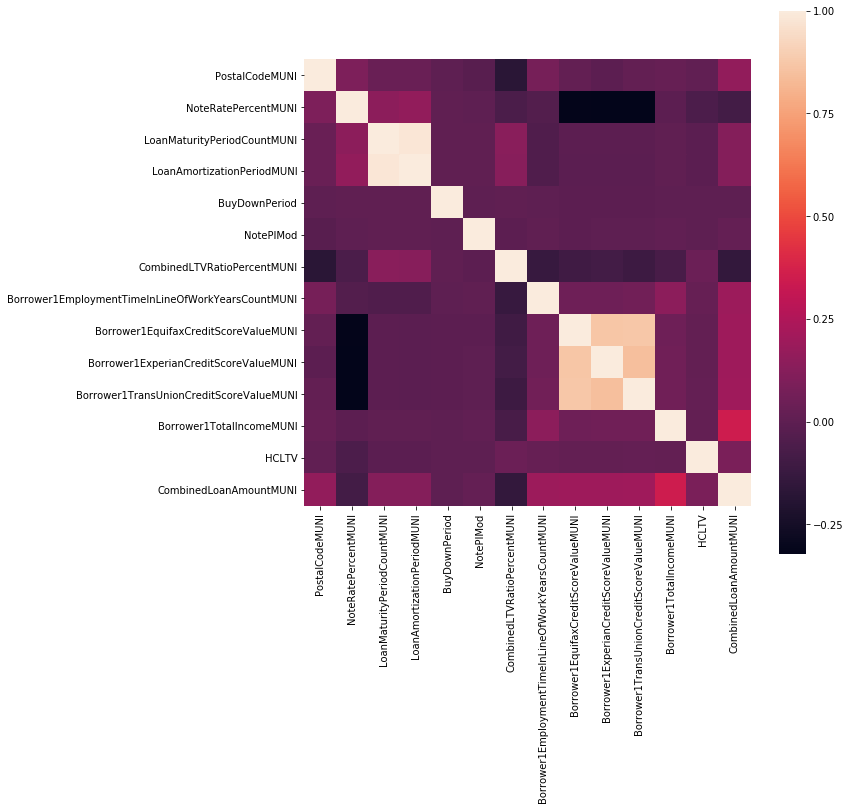

In [22]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, square=True);

In [19]:
#df2['CityNameMUNI'].value_counts()

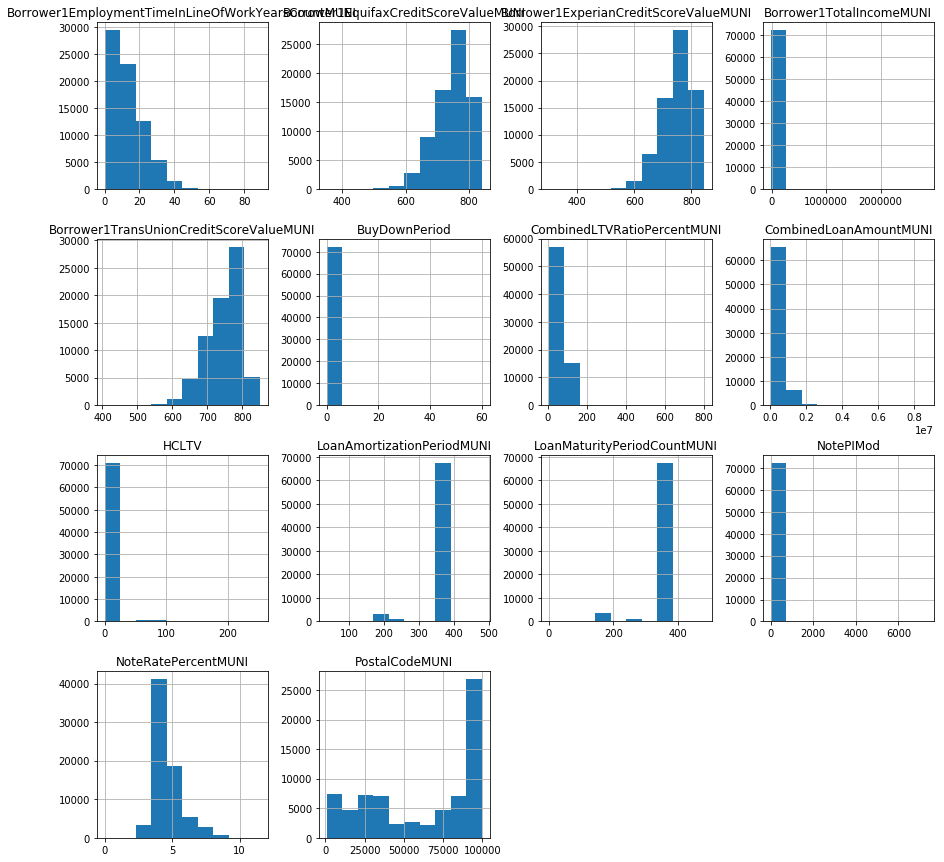

In [23]:
df.select_dtypes(include=['int64']).columns
df.hist(figsize=(15,15))
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()

In [26]:
#df.info()

In [7]:
label_encoder = preprocessing.LabelEncoder()

In [8]:
col_encode=[ 'StateCodeMUNI','PostalCodeMUNI', 'MortgageTypeLongName',
            'LoanAmortizationTypeMUNI','PaymentFrequencyTypeMUNI', 'PropertyUsageTypeMUNI',
            'LoanPurposeMUNI', 'CountyNameMUNI','TitleDocTypeMUNI', 'InitialPropertyValuationsASFGrade',
            'InitialComplianceASFGrade', 'FinalMoodysOverallLoanGrade', 'FinalMoodysLoanCreditGrade',
            'FinalMoodysLoanPropertyValuationsGrade', 'FinalMoodysLoanComplianceGrade']

In [9]:
for c in col_encode:
    df[c] = label_encoder.fit_transform(df[c])

In [10]:
df.head()

,LoanIdentifierValue,Deal,Borrower1LastNameMUNI,Borrower1FirstNameMUNI,CityNameMUNI,StateCodeMUNI,PostalCodeMUNI,MortgageTypeLongName,LoanAmortizationTypeMUNI,NoteRatePercentMUNI,...,Borrower1TransUnionCreditScoreValueMUNI,Borrower1TotalIncomeMUNI,InitialPropertyValuationsASFGrade,InitialComplianceASFGrade,FinalMoodysOverallLoanGrade,FinalMoodysLoanCreditGrade,FinalMoodysLoanPropertyValuationsGrade,FinalMoodysLoanComplianceGrade,HCLTV,CombinedLoanAmountMUNI
11405,1230405020,Zion Bank Review 2017-11_J07898,Sanchez,Janet,Los Angeles,4,6833,0,1,3.625,...,774,2499.46,0,2,2,0,0,2,0.0,168628.0
11829,1292254218,Zion Bank Review 2017-11_J07898,Garcia,Abel,Anaheim,4,7310,0,1,4.875,...,641,2506.72,2,2,2,0,2,2,0.0,300000.0
11952,1312286452,Zion Bank Review 2017-11_J07898,Yi,Paul,Los Angeles,4,6822,0,1,4.500,...,750,7260.43,0,0,0,0,0,0,0.0,450000.0
11964,1312356660,Zion Bank Review 2017-11_J07898,Venegas,Adolfo,Palmdale,4,7424,0,1,3.875,...,797,4641.00,0,1,1,0,0,1,0.0,244600.0
11986,1312497630,Zion Bank Review 2017-11_J07898,Walberg,Marion,Rio Verde,3,6558,0,1,4.000,...,788,3954.17,0,2,2,0,0,2,0.0,204300.0


In [13]:
features=df[['StateCodeMUNI','PostalCodeMUNI', 'MortgageTypeLongName','LoanAmortizationTypeMUNI','NoteRatePercentMUNI',
'PaymentFrequencyTypeMUNI', 'LoanMaturityPeriodCountMUNI', 'LoanAmortizationPeriodMUNI', 'BuyDownPeriod', 'NotePIMod', 'PropertyUsageTypeMUNI',
'LoanPurposeMUNI','CombinedLTVRatioPercentMUNI', 'CountyNameMUNI','TitleDocTypeMUNI', 
'Borrower1EmploymentTimeInLineOfWorkYearsCountMUNI', 'Borrower1EquifaxCreditScoreValueMUNI', 
'Borrower1ExperianCreditScoreValueMUNI','Borrower1TransUnionCreditScoreValueMUNI',
'Borrower1TotalIncomeMUNI','InitialPropertyValuationsASFGrade', 'InitialComplianceASFGrade','HCLTV']]

In [14]:
label= df['FinalMoodysLoanPropertyValuationsGrade']

In [15]:
X_train, X_val, y_train, y_val = train_test_split(features, label, train_size=0.8)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [44]:
from sklearn.svm import LinearSVC

#X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[ 1.06580868e-03 -1.49173182e-05 -2.44078996e-02  1.12499412e-02
   6.28480076e-03 -5.65958416e-04 -1.99084857e-03  2.56879166e-03
  -4.60199016e-03 -3.54472225e-04  4.05012731e-03 -1.47026997e-02
  -3.84757551e-04  7.01009638e-05 -9.79823004e-03 -4.69506705e-03
   7.06715501e-04 -1.33115981e-05  2.32291929e-04  6.94791390e-05
  -1.49132432e-01 -4.78608206e-02 -1.14559136e-03]
 [ 5.48265153e-04 -1.80509847e-05  1.74685666e-02  2.60211807e-03
  -2.76275633e-02 -2.71235468e-04  1.06749474e-03 -1.97908767e-03
   4.05196498e-03 -5.68408025e-05  7.40993202e-03  2.59833590e-02
  -2.72001035e-07  4.37068337e-06  8.21131697e-03  1.76003178e-03
  -8.89954483e-04  8.94085649e-05 -3.45639119e-05 -2.81690501e-05
   5.01229415e-02  2.23566280e-02  1.03957120e-03]
 [-1.50831906e-03 -3.14794461e-06  6.06797666e-03 -4.22688111e-03
   1.35687391e-03 -1.29337225e-03 -1.97197000e-04 -2.07954802e-04
   5.42821725e-04 -1.47540746e-04 -4.30010791e-04  1.17838255e-03
  -4.17402904e-04 -4.2331

In [45]:
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_val, y_val)))

Accuracy of RBF-kernel SVC on training set: 0.90
Accuracy of RBF-kernel SVC on test set: 0.90


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

In [48]:
from sklearn.svm import SVC
clf = SVC(C=10).fit(X_train_scaled, y_train)

In [49]:
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_val)))

RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.92
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.91


In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [51]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.91


In [26]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(features, label, train_size=0.8)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [55]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train1, y_train1)
y_pred_rf = rnd_clf.predict(X_val)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard'
)
voting_clf.fit(X_train1, y_train1)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

In [16]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
for name, score in zip(X_train, rnd_clf.feature_importances_):
    print(name, score)

StateCodeMUNI 0.028769601314912522
PostalCodeMUNI 0.06814284444414709
MortgageTypeLongName 0.008690476222777962
LoanAmortizationTypeMUNI 0.04226082620818318
NoteRatePercentMUNI 0.08028357549658395
PaymentFrequencyTypeMUNI 5.979802916941379e-09
LoanMaturityPeriodCountMUNI 0.00655290025542638
LoanAmortizationPeriodMUNI 0.006253773928698986
BuyDownPeriod 3.175825510728133e-05
NotePIMod 0.0005862294019956459
PropertyUsageTypeMUNI 0.010847395004851957
LoanPurposeMUNI 0.01551979235095223
CombinedLTVRatioPercentMUNI 0.05767115709538049
CountyNameMUNI 0.04506176022025901
TitleDocTypeMUNI 0.02190318211872792
Borrower1EmploymentTimeInLineOfWorkYearsCountMUNI 0.046699196691243866
Borrower1EquifaxCreditScoreValueMUNI 0.05562029097630655
Borrower1ExperianCreditScoreValueMUNI 0.05460563901331266
Borrower1TransUnionCreditScoreValueMUNI 0.05495121243283676
Borrower1TotalIncomeMUNI 0.067552999743388
InitialPropertyValuationsASFGrade 0.2924427160616346
InitialComplianceASFGrade 0.03205348996664309
HCLTV

In [18]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(features, label, train_size=0.8)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train1, y_train1)
y_pred_rf = rnd_clf.predict(X_val)

In [21]:
predictions = rnd_clf.predict(X_val1)
# Calculate the absolute errors
errors = abs(predictions - y_val1)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.19 degrees.
